In [1]:
import pandas
df = pandas.read_csv('bank.csv')
print(df)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from numpy.random import seed
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from subprocess import call
from IPython.display import Image
import torch
from torch import nn, optim
from torch.nn import functional as F

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ModuleNotFoundError: No module named 'tensorflow'

In [6]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix, classification_report




import warnings
warnings.filterwarnings(action="ignore")

In [8]:
df = pandas.read_csv('bank.csv')
print(df)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [9]:
print(df.shape)

(4521, 17)


In [10]:
print(df.duplicated().sum())
print(df.isnull().sum().sum())

0
0


In [11]:
df.dtypes.sort_values()

age           int64
previous      int64
pdays         int64
campaign      int64
duration      int64
balance       int64
day           int64
month        object
contact      object
loan         object
housing      object
default      object
education    object
marital      object
job          object
poutcome     object
y            object
dtype: object

In [12]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [13]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital
['married' 'single' 'divorced']
education
['primary' 'secondary' 'tertiary' 'unknown']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['cellular' 'unknown' 'telephone']
month
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [14]:
df.drop("duration",axis=1, inplace=True)

In [16]:
df.y.value_counts()/df.y.count()

no     0.88476
yes    0.11524
Name: y, dtype: float64

In [18]:
sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)
for train_index, test_index in sss.split(df.drop("y",axis=1), df.y):
    traindf=df.loc[train_index] #to select only rows (with all columns) we dont need comma and colon.
    testdf= df.loc[test_index]


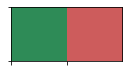

In [19]:
mypalette = ['seagreen', 'indianred']
sns.set_palette(mypalette)
sns.palplot(sns.color_palette())

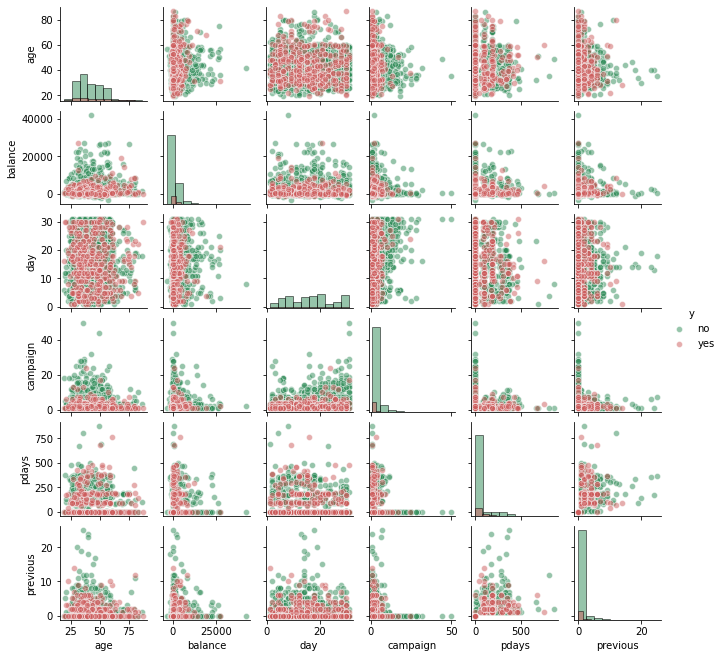

In [20]:
sns.pairplot(traindf, diag_kind='hist',  hue= 'y', height=1.5, 
             diag_kws={"edgecolor":"k", "alpha":0.5},
             plot_kws={"alpha":0.5})

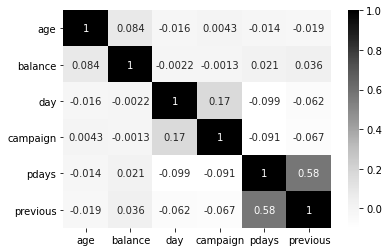

In [21]:
sns.heatmap(traindf.corr(method='pearson'), cmap="Greys", annot=True)

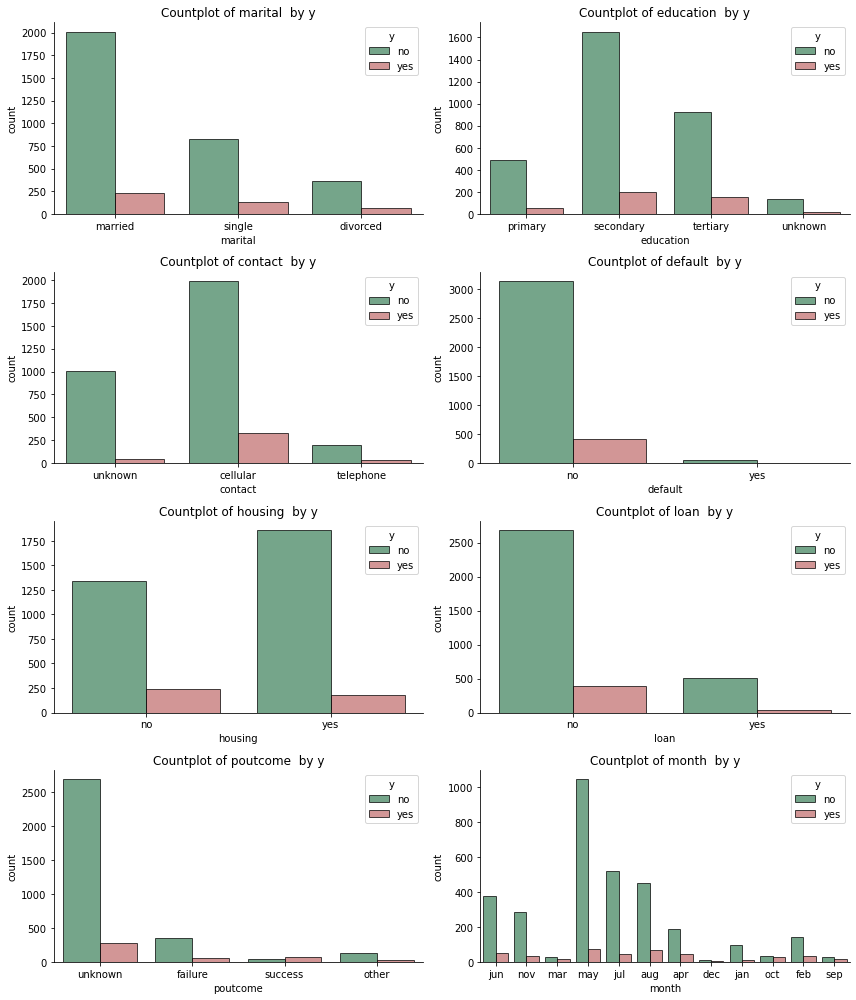

AttributeError: module 'seaborn' has no attribute 'y'

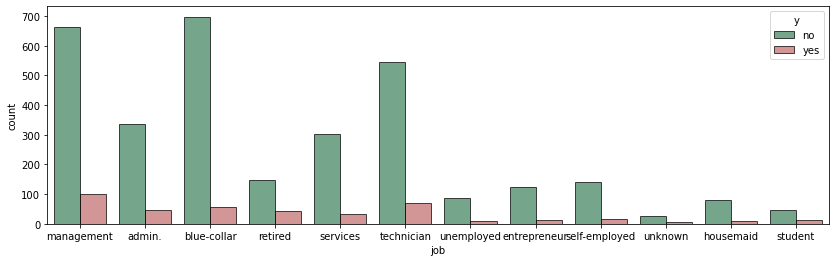

In [26]:
plt.figure(figsize=[12,14])
features=["marital", "education", "contact", "default", "housing", "loan", "poutcome", "month"]
n=1
for f in features:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='y', edgecolor="black", alpha=0.7, data=traindf)
    sns.despine()
    plt.title("Countplot of {}  by y".format(f))
    n=n+1
plt.tight_layout()
plt.show()


    
plt.figure(figsize=[14,4])
sns.countplot(x='job', hue='y',edgecolor="black", alpha=0.7, data=traindf)
sns.y()
plt.title("Countplot of job by y")
plt.show()

In [28]:
LE=LabelEncoder()
df['y']=LE.fit_transform(df.y.values)

#encoding categorical features
df=pd.get_dummies(df)

In [29]:
for train_index, test_index in sss.split(df.drop("y",axis=1), df.y):
    traindf=df.loc[train_index]
    testdf= df.loc[test_index]

In [30]:
xtrain=traindf.drop('y', axis=1)
ytrain=traindf.y

xtest=testdf.drop('y', axis=1)
ytest=testdf.y

In [31]:
# pipeline combining transformers and estimator
pipe_knn= make_pipeline(StandardScaler(), KNeighborsClassifier())
 
# grid searh to choose the best (combination of) hyperparameters
gs_knn=GridSearchCV(estimator= pipe_knn,
               param_grid={'kneighborsclassifier__n_neighbors':[4,5,6,7]},
               scoring='accuracy',
               cv=10)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_knn_scores = cross_val_score(gs_knn, X=xtrain, y=ytrain, cv=5,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
gs_knn.fit(xtrain, ytrain)
gs_knn_best=gs_knn.best_estimator_
gs_knn_best.fit(xtrain, ytrain)

print('Train Accuracy:   {0:.1f}%'.format(gs_knn.score(xtrain, ytrain)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_knn_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_knn.score(xtest, ytest)*100))

Train Accuracy:   89.4%
CV Mean Accuracy: 88.1%
Test Accuracy:    89.1%
